# Multiple Linear Regression
## Rental Bike Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

Essentially, the company wants —

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the rental-bike dataset

In [57]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [58]:
import numpy as np
import pandas as pd

In [59]:
bike = pd.read_csv("day.csv")

In [60]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe

In [61]:
bike.shape

(730, 16)

Dropping variables which are insignificant

In [62]:
bike = bike.drop(['instant','dteday','casual','registered'], axis=1)

In [63]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Converting season, weathersit, yr, workingday, mnth, weekday and holiday into categorial variable

In [64]:
bike.season = bike.season.astype('category',copy=False)
bike.weathersit = bike.weathersit.astype('category',copy=False)
bike.yr = bike.yr.astype('category',copy=False)
bike.workingday = bike.workingday.astype('category',copy=False)
bike.mnth = bike.mnth.astype('category',copy=False)
bike.weekday = bike.weekday.astype('category',copy=False)
bike.holiday = bike.holiday.astype('category',copy=False)

In [65]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [66]:
bike.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

Now doing the most important step - **understanding the data**.
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

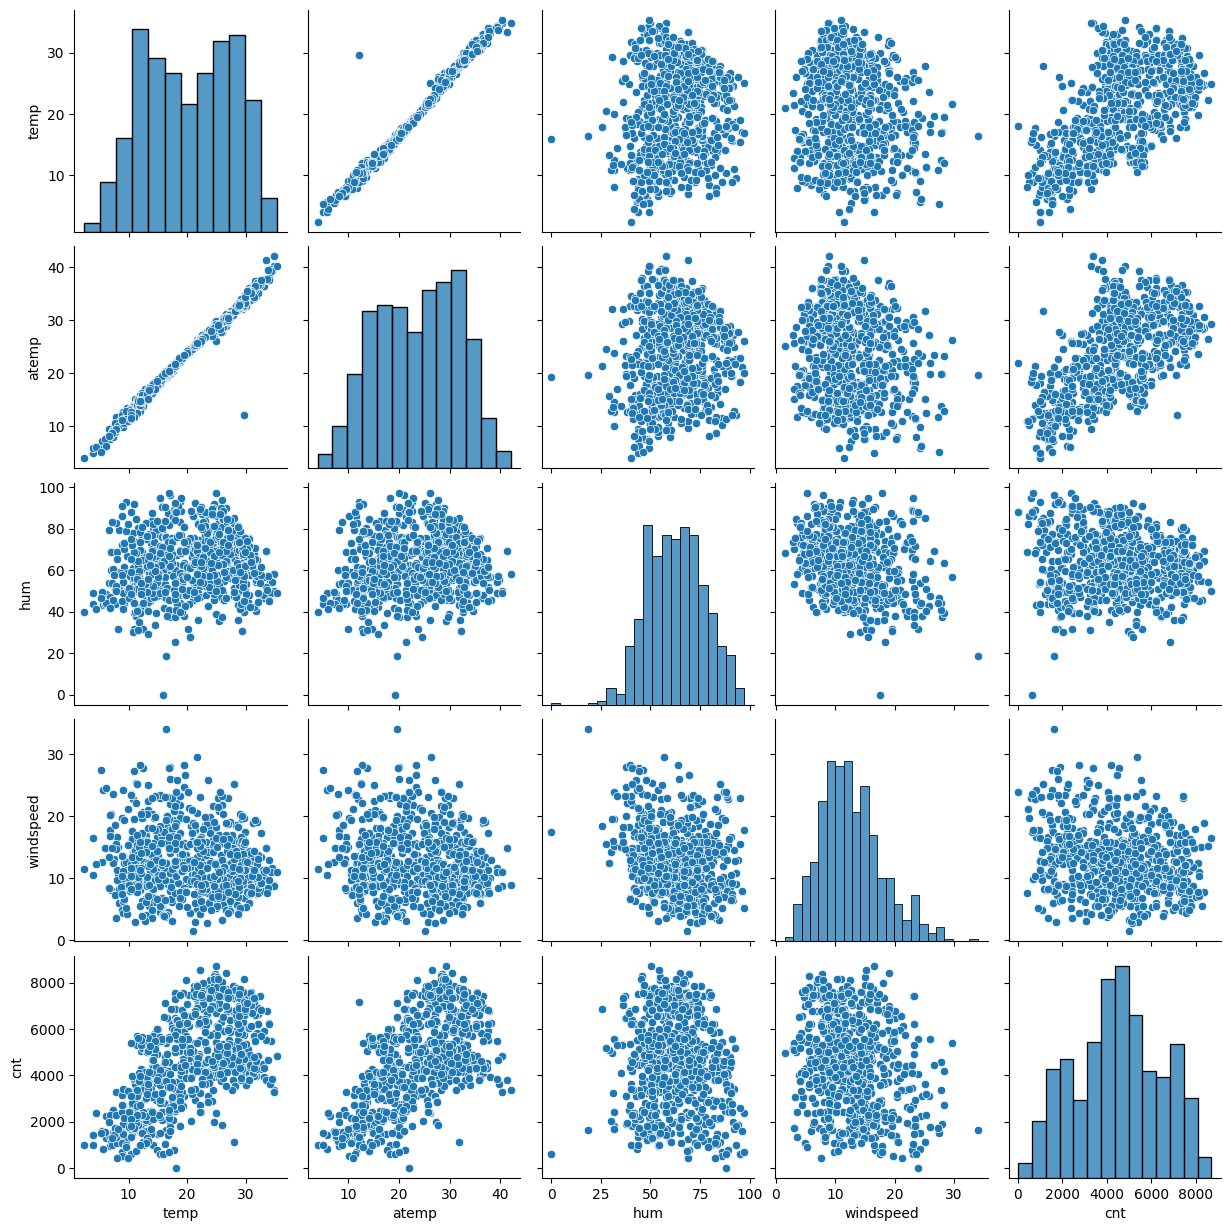

In [68]:
sns.pairplot(bike)
plt.show()

By plotting pair plot it can be predicted that `atemp` has higher correlation with `cnt`

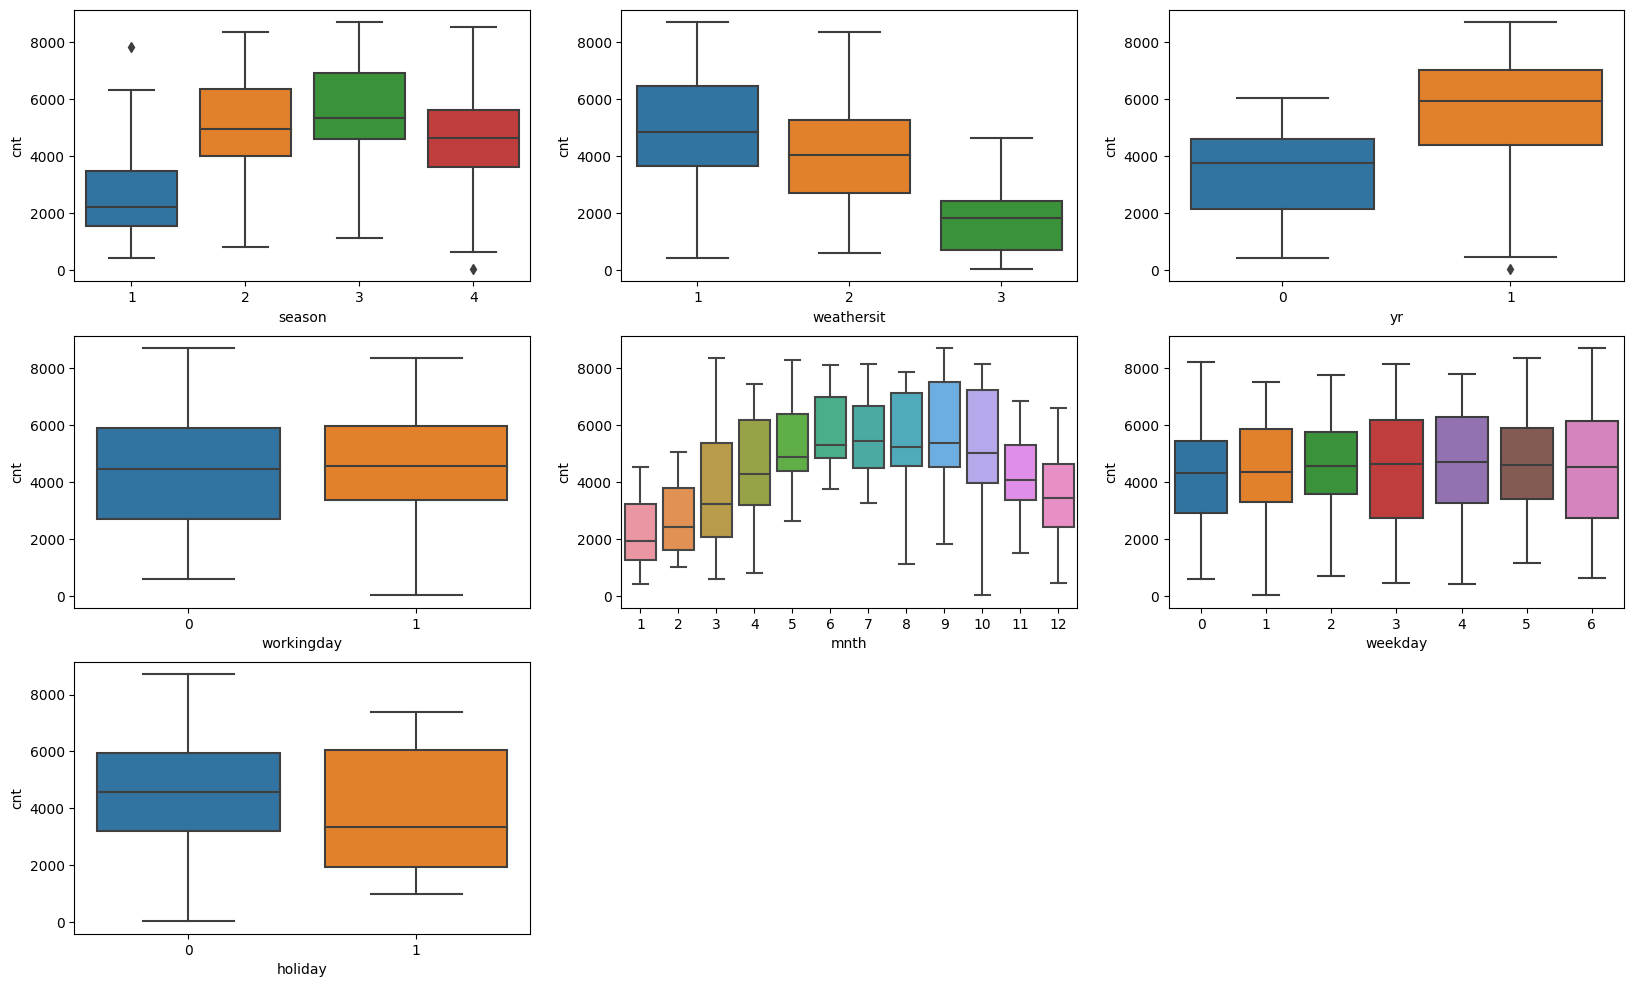

In [69]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

From this, it can be predicated that `weathersit` and `yr` have huge impact on `cnt`, while `workingday` didn’t impact much.

## Step 3: Dummy Variables

Since there are few categorial variables (`season`,`mnth`,`weekday` and `weathersit`), with multiple value range, so dummy variable creation can help in better prediction.

The variable `season` has four values. So using `dummy variables` for the same.

In [70]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'
season_dummy = pd.get_dummies(bike['season'])
season_dummy = season_dummy.rename({1:"spring", 2:"summer" , 3:"fall", 4:"winter"}, axis='columns')
season_dummy.head()

,spring,summer,fall,winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


Now, we don't need 4 columns. You can drop the `1` column, as the type of season can be identified with just the last 3 columns where — 
- `000` will correspond to `1(spring)`
- `100` will correspond to `2(summer)`
- `010` will correspond to `3(fall)`
- `001` will correspond to `4(winter)` 

In [71]:
# Let's drop the first column from status df using 'drop_first = True'

season_dummy = pd.get_dummies(bike['season'], drop_first = True)
season_dummy = season_dummy.rename({1:"spring", 2:"summer" , 3:"fall", 4:"winter"}, axis='columns')
season_dummy.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [72]:
# Add the results to the original bike dataframe and dropping 'season' column

bike = pd.concat([bike, season_dummy], axis = 1)
bike = bike.drop(['season'],axis=1)

In [73]:
# Now let's see the head of dataframe.

bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [74]:
#similarly doing the same activity for month
month_dummy = pd.get_dummies(bike['mnth'], drop_first = True)
month_dummy = month_dummy.rename({1:"Jan", 2:"Feb" , 3:"Mar", 4:"Apr",5:"May", 6:"Jun", 7:"Jul", 8:"Aug"
, 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}, axis='columns')
bike = pd.concat([bike, month_dummy], axis = 1)
bike = bike.drop(['mnth'],axis=1)
bike.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#similarly doing the same activity for weekday
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True)
weekday_dummy = weekday_dummy.rename({0:"Sun", 1:"Mon" , 2:"Tue", 3:"Wed",4:"Thurs", 5:"Fri", 6:"Sat"}, axis='columns')
bike = pd.concat([bike, weekday_dummy], axis = 1)
bike = bike.drop(['weekday'],axis=1)
bike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,...,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat
0,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
#similarly doing the same activity for weathersit
weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first = True)
weathersit_dummy = weathersit_dummy.rename({1:"Partly cloudy" , 2:"Mist", 3:"Light Rain",4:"Heavy Rain"}, axis='columns')
bike = pd.concat([bike, weathersit_dummy], axis = 1)
bike = bike.drop(['weathersit'],axis=1)
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

First basic step for regression is performing a train-test split.

In [77]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Rain
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


### Rescaling the Features 

As you saw that temp, atemp,hum, windspeed and cnt have difference with numeral values as compared to other categorial variables.
So we will do scaling using MinMax and standard scaling, will check which one will give better prediction

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler1 = StandardScaler() 
# results are better with standardscaler, so using the same

In [79]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler1.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Rain
653,1,0,1,-0.121335,-0.055878,-0.514725,-0.117752,1.562685,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,1.231731,1.194106,0.516433,-0.330615,1.399629,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,-0.420478,-0.348834,-0.069854,-0.385694,-0.215554,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,-1.294913,-1.473492,-1.045032,2.018143,-1.379511,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,-0.627580,-0.571474,-1.000840,-0.779889,-0.136589,1,0,...,0,0,0,0,0,0,0,1,1,0


In [80]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Feb,Mar,...,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Rain
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,-2.385891e-16,4.231909e-16,-3.831358e-16,-2.263984e-16,-5.224579e-17,0.245098,0.262745,0.24902,0.066667,0.098039,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.430568,0.440557,0.43287,0.249689,0.297660,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,-2.381246e+00,-2.417741e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.749555e-01,-8.526058e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.443562e-02,6.514277e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.773604e-01,8.269866e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.050938e+00,2.295305e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


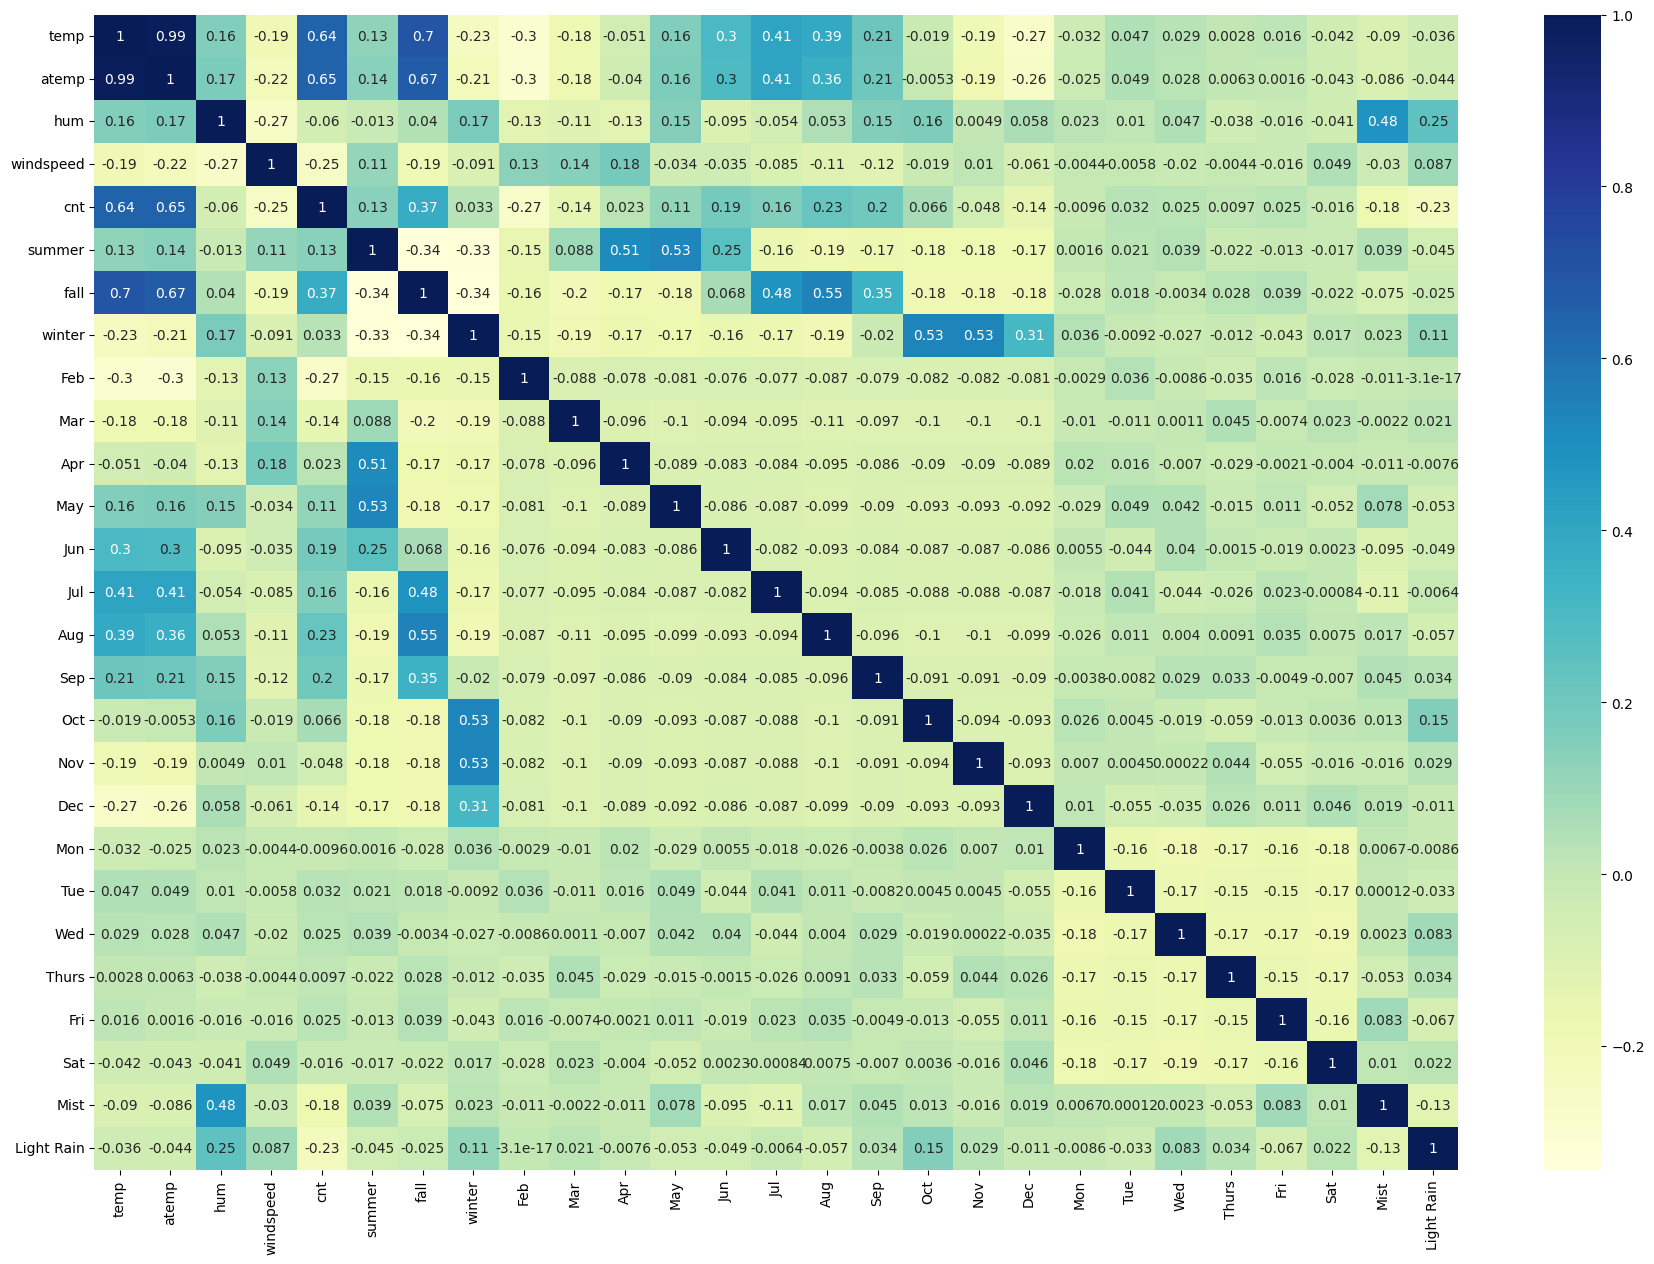

In [81]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (22, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `atemp` seems to the correlated to `cnt` the most. Let's see a pairplot for `atemp` vs `cnt`.

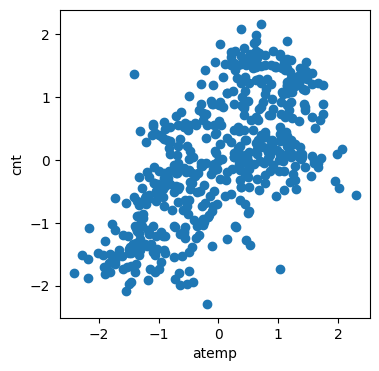

In [82]:
plt.figure(figsize=[4,4])
plt.scatter(df_train.atemp, df_train.cnt)
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.show()

So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [83]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [84]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [85]:
# Check the parameters obtained

lr.params

const   -3.989864e-17
atemp    6.464752e-01
dtype: float64

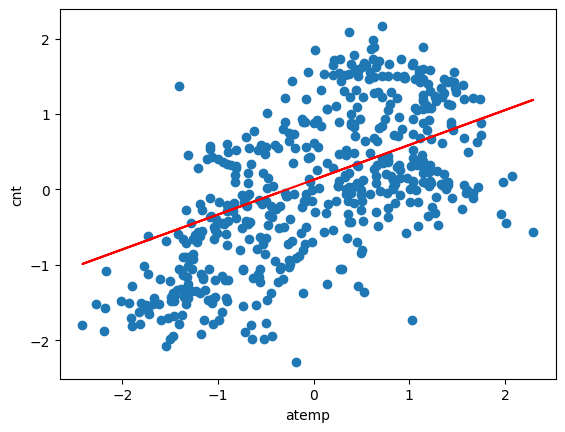

In [86]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.show()

In [87]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           1.10e-61
Time:                        17:11:04   Log-Likelihood:                -585.66
No. Observations:                 510   AIC:                             1175.
Df Residuals:                     508   BIC:                             1184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.99e-17      0.034  -1.18e-15      1.0

### Adding another variable

The R-squared value obtained is `0.418`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `temp`.

In [88]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'temp']]

In [89]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const   -3.989864e-17
atemp    4.655572e-01
temp     1.828309e-01
dtype: float64

In [90]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           1.95e-60
Time:                        17:11:04   Log-Likelihood:                -585.36
No. Observations:                 510   AIC:                             1177.
Df Residuals:                     507   BIC:                             1189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.99e-17      0.034  -1.18e-15      1.0

There is not much change, R-squared value is changed to `0.419` from `0.418`, this time , we will add another higher co-related variable i.e., season- 3(fall)

In [91]:
X_train_lm = X_train[['atemp', 'temp', 'fall']]

In [92]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.082017
atemp    0.331931
temp     0.410889
fall    -0.312153
dtype: float64

In [93]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     126.2
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           5.05e-61
Time:                        17:11:04   Log-Likelihood:                -581.24
No. Observations:                 510   AIC:                             1170.
Df Residuals:                     506   BIC:                             1187.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0820      0.044      1.859      0.0

There is slight change, R-squared value is changed to `0.428` from `0.419`, this time , we will add all co-related variables 

In [94]:
# Check all the columns of the dataframe

bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'summer', 'fall', 'winter', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Mon', 'Tue', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Mist', 'Light Rain'],
      dtype='object')

In [95]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const        -1.133363
yr            1.034921
holiday      -0.188943
workingday    0.195564
temp          0.403558
atemp         0.047876
hum          -0.098608
windspeed    -0.139401
summer        0.386838
fall          0.216516
winter        0.686215
Feb           0.135442
Mar           0.284587
Apr           0.278847
May           0.388892
Jun           0.271254
Jul           0.103795
Aug           0.350496
Sep           0.643445
Oct           0.313142
Nov           0.092626
Dec           0.075739
Mon          -0.044329
Tue          -0.034552
Wed           0.025952
Thurs         0.008049
Fri           0.051502
Sat           0.243045
Mist         -0.272004
Light Rain   -1.144068
dtype: float64

In [96]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          8.42e-181
Time:                        17:11:05   Log-Likelihood:                -234.14
No. Observations:                 510   AIC:                             526.3
Df Residuals:                     481   BIC:                             649.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1334      0.103    -11.052      0.0

R-squared have improved, but still there are few variables, which have high p-value and can be dropped, before that, will check for VIF too

### Checking VIF

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,Thurs,inf
25,Fri,inf
21,Mon,inf
1,holiday,inf
23,Wed,inf
22,Tue,inf
2,workingday,inf
3,temp,62.26
4,atemp,55.89
8,fall,15.34


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `Wed,Thurs,Fri,jul,nov and dec` as it has a very higher p-value and VIF is also higher for these variables. Let's go ahead and drop this variables

In [99]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop(['Wed','Thurs','Jul','Fri','Nov','Dec'], 1,)

In [100]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [101]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.7
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          9.25e-186
Time:                        17:11:06   Log-Likelihood:                -234.62
No. Observations:                 510   AIC:                             517.2
Df Residuals:                     486   BIC:                             618.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0953      0.082    -13.412      0.0

In [102]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,59.87
4,atemp,55.14
7,summer,7.04
8,fall,5.57
2,workingday,4.99
13,May,3.47
12,Apr,3.34
9,winter,2.58
21,Mist,2.38
14,Jun,2.26


Now we see that r-square value is better with the above fitting,so we will make our prediction using above model only

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [103]:
y_train_price = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

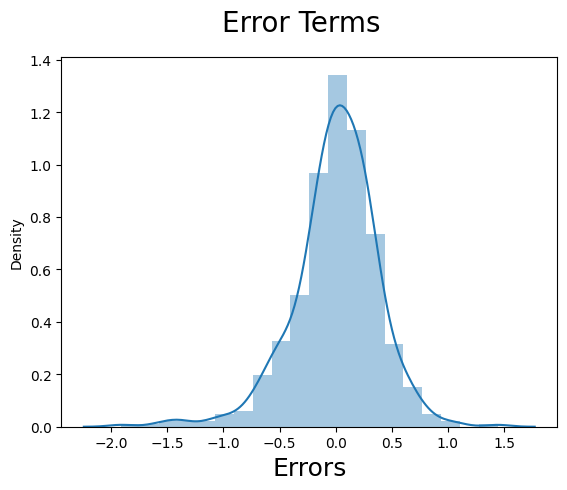

In [104]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. second model.

#### Applying the scaling on the test sets

In [105]:
num_vars1 = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars1] = scaler1.transform(df_test[num_vars1])
df_test.describe()

,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Feb,Mar,...,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.096083,0.094272,-0.081388,-0.043731,0.031073,0.264840,0.246575,0.232877,0.100457,0.054795,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,1.035793,1.026916,1.022197,0.942916,0.973536,0.442259,0.432005,0.423633,0.301297,0.228100,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,-2.174744,-2.295437,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.809372,-0.792914,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.094973,0.170654,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.983209,0.947998,0.641963,0.485055,0.709202,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.981904,2.205446,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [106]:
y_test = df_test.pop('cnt')
X_test = df_test

In [107]:
# Adding constant variable to test dataframe
X_test_m2 = sm.add_constant(X_test)

In [108]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m2 = X_test_m2.drop(['Wed','Thurs','Jul','Fri','Nov','Dec'], axis = 1)

In [109]:
# Making predictions using the second model

y_pred_m2 = lr_2.predict(X_test_m2)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

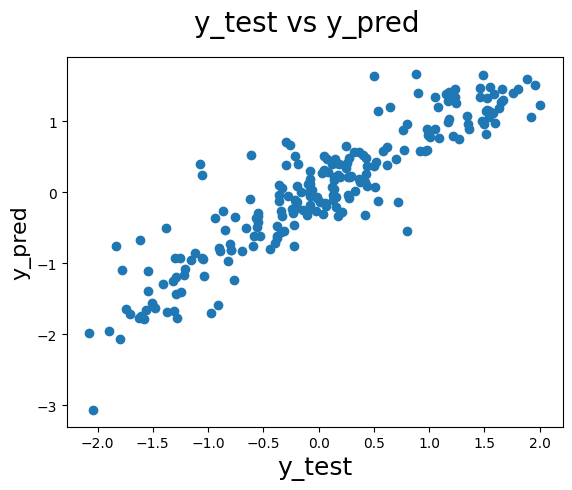

In [110]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [111]:
#evaluation on test data set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m2)

0.8299746715957621


We can see that the equation of our best fitted line is:

$ cnt = 1.0326 \times yr + 0.4236  \times  temp + 0.2224   \times  workingday + 0.0396 \times atemp + 0.4087 \times summer + 0.2627 \times fall + 0.7427 \times winter + 0.1126 \times Feb + 0.2451 \times Mar + 0.2230 \times Apr + 0.3254 \times May + 0.1905  \times  Jun + 0.2542   \times  Aug + 0.5499 \times Sep + 0.2229 \times Oct  -0.1618  \times holiday -0.0995 \times hum  -0.1836 \times windspeed -0.0730 \times Mon -0.0633 \times Tue -0.2700 \times Mist -1.1469 \times Light Rain$
